In [3]:
#Importing Necessary libraries for loading and plotting data
import pandas as pd   #pandas help in loading the csv and other format into a dataframe
import matplotlib.pyplot as plt #matplotlib is used for plotting the visualisation
import seaborn as sns #seaborn is another visualization library
import numpy as np  #Numpy is used for mathematical operations
from scipy.stats import skew, kurtosis #These functions from scip are used to calculate skewness and kurtosis 


In [49]:
#Loading the data into a dataframe by reading the csv file
data = pd.read_csv('Wholesale_customers_data.csv')
data.head(10) #shows top 10 data entry in the csv file

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [33]:
data.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     15079 non-null  object
 1   Age             15079 non-null  int64 
 2   Gender          15079 non-null  object
 3   Annual Income   15079 non-null  int64 
 4   Spending Score  15079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 589.2+ KB


In [35]:
data.shape

(15079, 5)

In [36]:
def calculate_skewness_kurtosis(data, column_name):
    """
    Calculates and prints the skewness and kurtosis for a specified column in the given DataFrame.

    Parameters:
    - data: DataFrame containing the data.
    - column_name: String, the name of the column for which skewness and kurtosis are to be calculated.

    Skewness measures the asymmetry of the probability distribution of a real-valued random variable about its mean. 
    Positive skewness indicates a distribution with an asymmetric tail extending toward more positive values.
    
    Kurtosis measures the "tailedness" of the probability distribution. A higher kurtosis indicates a distribution with heavier tails, 
    and a lower kurtosis indicates a distribution with lighter tails.
    """
    skewness = data[column_name].skew()
    kurtosis = data[column_name].kurtosis()

    print(f"Skewness for {column_name}:", skewness)
    print(f"Kurtosis for {column_name}:", kurtosis)


In [37]:
calculate_skewness_kurtosis(data,'Spending Score')

Skewness for Spending Score: -0.0019962622645593566
Kurtosis for Spending Score: -1.1829951978577171


In [50]:
"""you can quickly identify which variables are positively correlated
, negatively correlated, or not correlated with each other. 
This information can help you understand the relationships
between different features in your dataset, which is 
useful for further analysis and modeling. """

def correlation_heatmap(data):
    # Compute the correlation matrix
    correlation_matrix = data.corr()

    # Generate a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()



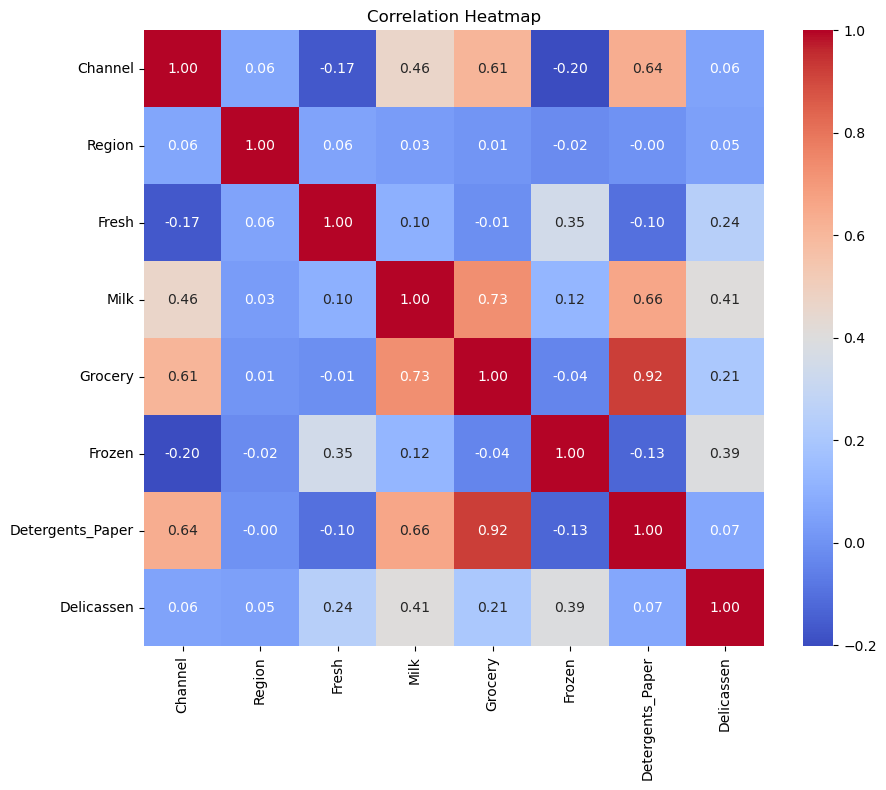

In [51]:
correlation_heatmap(data)

# Relational Graph Function

In [52]:
"""let's create a bar chart to visualize the total quantities
of each product category across all entries in the dataset"""

def product_bar_chart(data):
    # Calculate the total quantities for each product category
    total_quantities = data.sum(axis=0)[2:]  # Exclude 'Channel' and 'Region' columns

    # Extract product category names
    product_categories = total_quantities.index.tolist()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(product_categories, total_quantities, color='skyblue')
    plt.title('Total Quantities of Product Categories')
    plt.xlabel('Product Categories')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

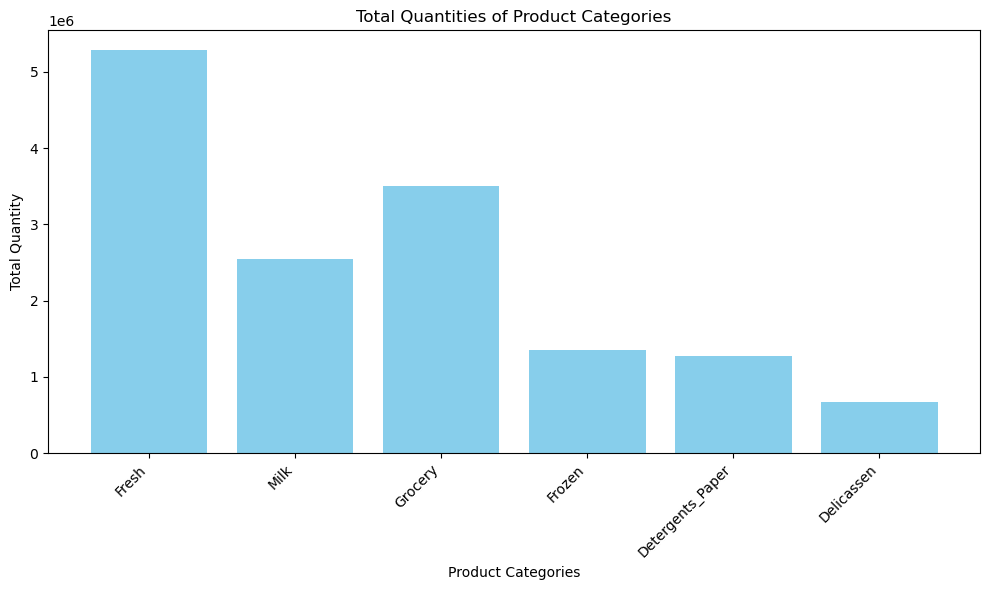

In [53]:
product_bar_chart(data)

In [57]:
# scatter plot

"""Let's create a scatter plot to visualize the relationship
between two variables in the dataset. Here, we'll plot 
'Fresh' against 'Milk' as an example:"""


def scatter_plot(data, x_var, y_var):
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_var], data[y_var], color='blue', alpha=0.5)
    plt.title(f'Scatter Plot of {x_var} vs {y_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.grid(True)
    plt.show()



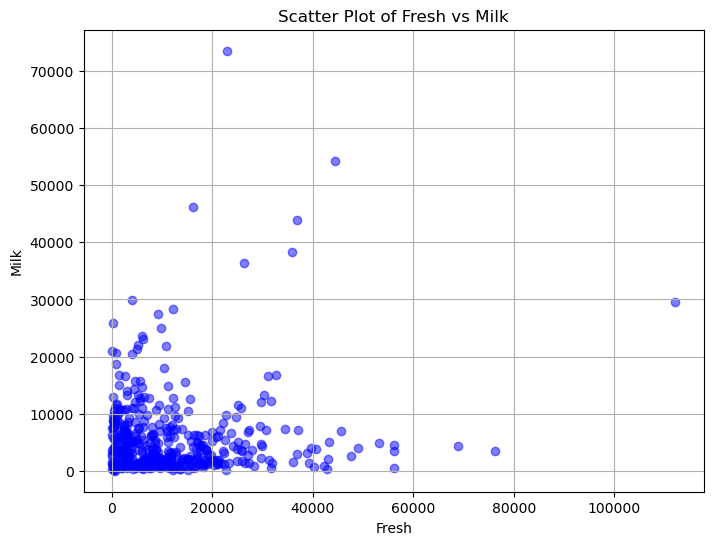

In [56]:
scatter_plot(data, 'Fresh', 'Milk')

#           Categorical Graph Function

In [58]:
#Box Plot

def box_plot(data):
    # Setting up the figure size
    plt.figure(figsize=(10, 6))
    
    # Creating the box plot
    sns.boxplot(data=data, orient='v', palette='Set2')
    
    # Adding titles and labels
    plt.title('Box Plot of Product Categories')
    plt.xlabel('Product Categories')
    plt.ylabel('Quantity')
    
    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Showing the plot
    plt.tight_layout()
    plt.show()


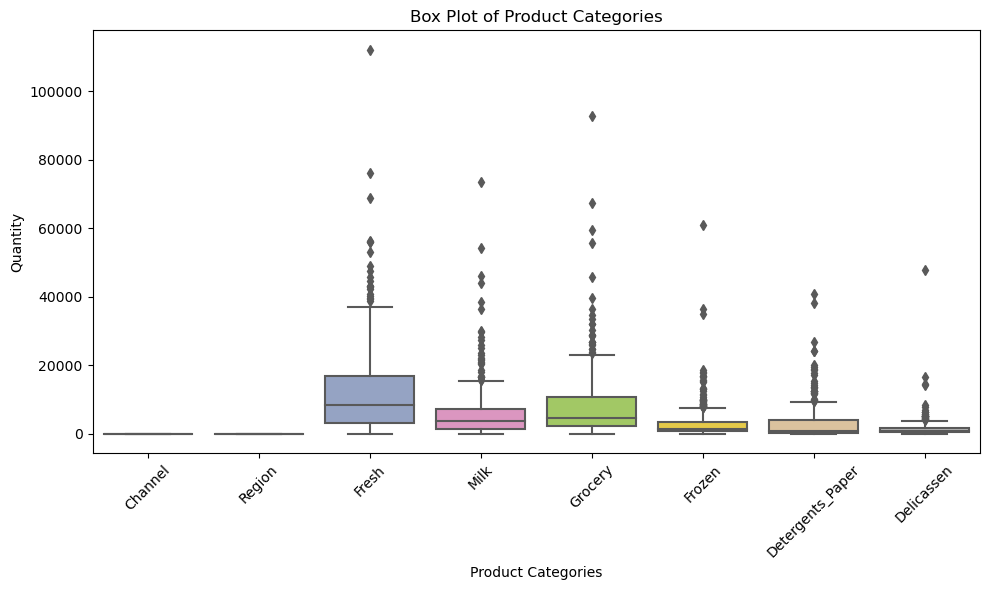

In [59]:
box_plot(data)

# Statistical Graph Function

In [60]:

def violin_plot(data):
    # Setting up the figure size
    plt.figure(figsize=(10, 6))
    
    # Creating the violin plot
    sns.violinplot(data=data, orient='v', palette='Set2')
    
    # Adding titles and labels
    plt.title('Violin Plot of Product Categories')
    plt.xlabel('Product Categories')
    plt.ylabel('Quantity')
    
    # Rotating x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Showing the plot
    plt.tight_layout()
    plt.show()

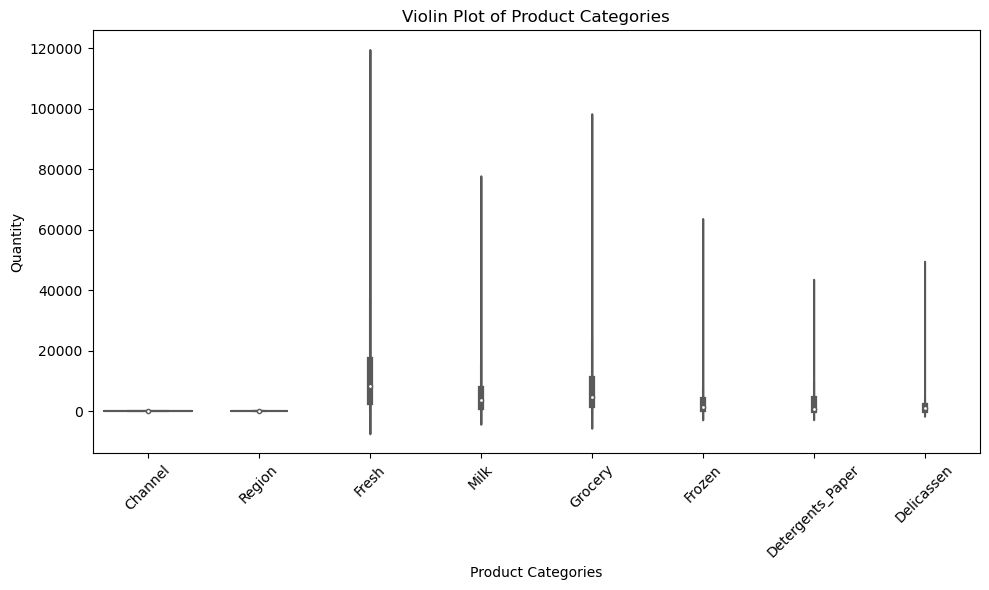

In [61]:
violin_plot(data)

# Elbow Plot

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

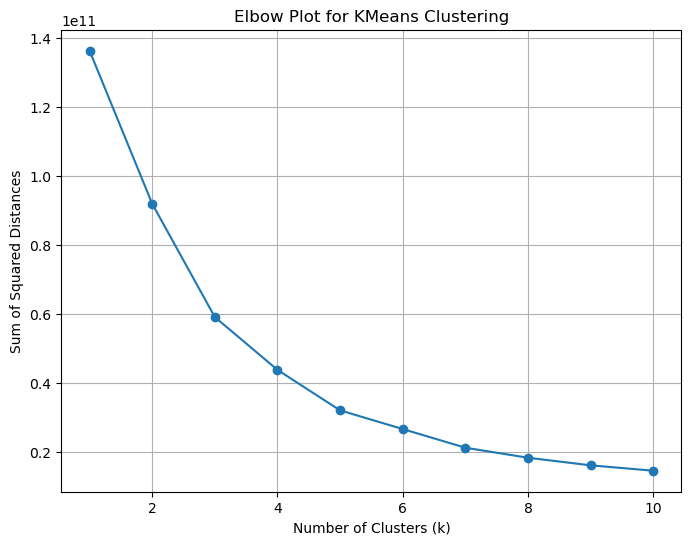

In [65]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def elbow_plot_kmeans(data, max_clusters=10):
    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    
    # Calculate sum of squared distances for different values of k
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(reduced_data)
        sse.append(kmeans.inertia_)
    
    # Plot the elbow plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), sse, marker='o', linestyle='-')
    plt.title('Elbow Plot for KMeans Clustering')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming your dataset is stored in a DataFrame named 'df'
# Call the function with your DataFrame
elbow_plot_kmeans(data)


In [66]:
def kmeans_clustering(data, k):
    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)
    
    return clusters

# Example usage:
# Assuming your dataset is stored in a DataFrame named 'df'
# and the optimal k value is determined as 3 (for example)
optimal_k = 3
clusters = kmeans_clustering(data, optimal_k)
print("Clusters:", clusters)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters: [0 0 0 0 2 0 0 0 0 1 0 0 2 0 2 0 0 0 0 0 0 0 2 1 2 0 0 0 1 2 0 0 0 2 0 0 2
 0 1 2 2 0 0 1 0 1 1 1 0 1 0 0 2 0 2 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 2 0 2 0 0 1 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0
 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 2 0 0 0 0 2 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 2 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 2
 2 0 0 0 0 0 1 1 0 1 0 0 0 0 2 0 0 2 0 0 0 0 0 2 2 2 2 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 2 1 0 0 0 0 0 0 1 0 0 0 0 2 2 0 0 0 0 0 1 0
 1 0 2 0 0 0 0 0 0 0 1 0 0 0 2 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 2 0 0 2 0 2 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 2 0 0 2
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 2 1 0 0]


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


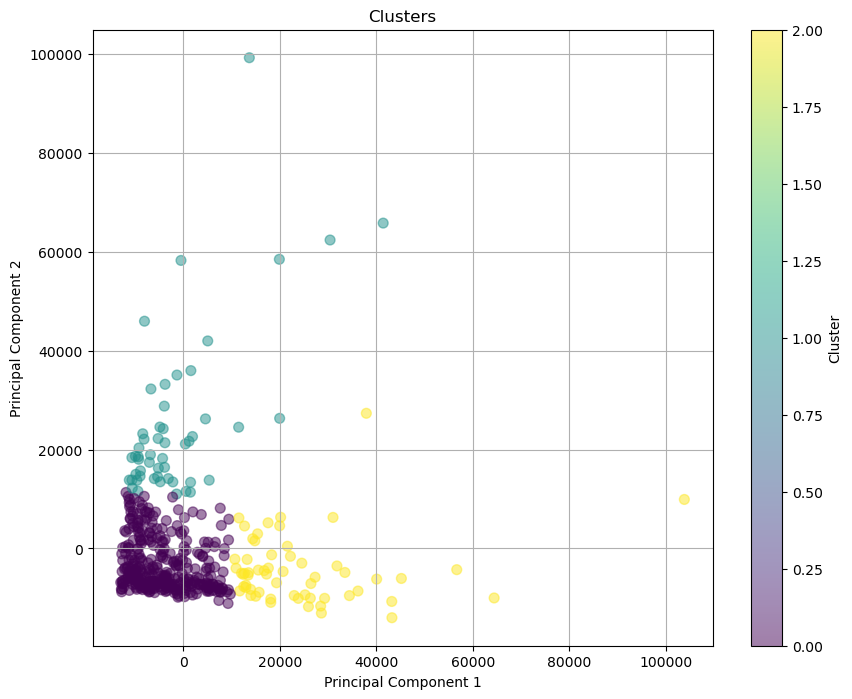

In [71]:
def plot_clusters(data, clusters):
    # Perform PCA to reduce dimensionality
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Plotting the clusters
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
    plt.title('Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming your dataset is stored in a DataFrame named 'df'
# and the optimal k value is determined as 3 (for example)
optimal_k = 3
clusters = kmeans_clustering(data, optimal_k)

# Visualize the clusters
plot_clusters(data, clusters)


In [75]:
#Cluster Prediction 

optimal_k = 3
clusters = kmeans_clustering(data, optimal_k)

# Print cluster predictions for each data point
print("Cluster Predictions:")
for i, cluster in enumerate(clusters):
    print(f"Data point {i+1}: Cluster {cluster}")

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Predictions:
Data point 1: Cluster 0
Data point 2: Cluster 0
Data point 3: Cluster 0
Data point 4: Cluster 0
Data point 5: Cluster 2
Data point 6: Cluster 0
Data point 7: Cluster 0
Data point 8: Cluster 0
Data point 9: Cluster 0
Data point 10: Cluster 1
Data point 11: Cluster 0
Data point 12: Cluster 0
Data point 13: Cluster 2
Data point 14: Cluster 0
Data point 15: Cluster 2
Data point 16: Cluster 0
Data point 17: Cluster 0
Data point 18: Cluster 0
Data point 19: Cluster 0
Data point 20: Cluster 0
Data point 21: Cluster 0
Data point 22: Cluster 0
Data point 23: Cluster 2
Data point 24: Cluster 1
Data point 25: Cluster 2
Data point 26: Cluster 0
Data point 27: Cluster 0
Data point 28: Cluster 0
Data point 29: Cluster 1
Data point 30: Cluster 2
Data point 31: Cluster 0
Data point 32: Cluster 0
Data point 33: Cluster 0
Data point 34: Cluster 2
Data point 35: Cluster 0
Data point 36: Cluster 0
Data point 37: Cluster 2
Data point 38: Cluster 0
Data point 39: Cluster 1
Data point 40

In [77]:
# cluster fitting 

from sklearn.cluster import KMeans
import numpy as np

def kmeans_fit(data, k):
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    
    # Get the cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    return cluster_centers, labels

# Example usage:
# Assuming your dataset is stored in a DataFrame named 'df'
# and the optimal k value is determined as 3 (for example)
optimal_k = 3
cluster_centers, labels = kmeans_fit(data, optimal_k)

# Print the cluster centers and labels
print("Cluster Centers:")
print(cluster_centers)
print("\nLabels:")
print(labels)


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
[[1.26060606e+00 2.55454545e+00 8.25346970e+03 3.82460303e+03
  5.28045455e+03 2.57266061e+03 1.77305758e+03 1.13749697e+03]
 [1.13333333e+00 2.56666667e+00 3.59414000e+04 6.04445000e+03
  6.28861667e+03 6.71396667e+03 1.03966667e+03 3.04946667e+03]
 [1.96000000e+00 2.44000000e+00 8.00004000e+03 1.85114200e+04
  2.75739000e+04 1.99668000e+03 1.24073600e+04 2.25202000e+03]]

Labels:
[0 0 0 0 1 0 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 1 2 1 0 0 0 2 1 0 0 0 1 0 0 1
 0 2 1 1 0 0 2 0 2 2 2 0 2 0 0 1 0 1 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 2 1 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 2 0 0
 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 1 0 0 2 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 1
 1 0 0 1 0 0 2 2 0 2 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 